<a href="https://colab.research.google.com/github/UdayTripathi108/Comparison-of-different-Deep-Learning-Models-on-Skin-Disease-Classification/blob/main/Skin_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

In [ ]:
import numpy as np
import os
import PIL
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

IMG_SIZE = 240
IMG_PATH = '/content/drive/MyDrive/Split_smol'



In [ ]:
def load_data():
    dataset = []
    labels = []
    label_to_index = {}
    idx = 0

    for folder in os.listdir(IMG_PATH + '/train'):
        label_to_index[folder] = idx
        for file in os.listdir(IMG_PATH + '/train/' + folder):
            img_path = os.path.join(IMG_PATH + '/train/' + folder, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            dataset.append(img)
            labels.append(folder)
        idx += 1


    labels = [label_to_index[label] for label in labels]

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [ ]:

data, labels = load_data()


num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)


train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


cnn_model = create_cnn_model((IMG_SIZE, IMG_SIZE, 3), num_classes)


cnn_model.compile(optimizer=Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


history_cnn = cnn_model.fit(train_data, train_labels,
                            batch_size=32,
                            epochs=10,
                            validation_data=(val_data, val_labels))



Epoch 1/10
18/18 [==============================] - 8s 145ms/step - loss: 4.4473 - accuracy: 0.1221 - val_loss: 2.0711 - val_accuracy: 0.3714
Epoch 2/10
18/18 [==============================] - 1s 60ms/step - loss: 2.0273 - accuracy: 0.2298 - val_loss: 1.8523 - val_accuracy: 0.3429
Epoch 3/10
18/18 [==============================] - 1s 55ms/step - loss: 1.8094 - accuracy: 0.3196 - val_loss: 1.6599 - val_accuracy: 0.4071
Epoch 4/10
18/18 [==============================] - 1s 57ms/step - loss: 1.6308 - accuracy: 0.3842 - val_loss: 1.6543 - val_accuracy: 0.3571
Epoch 5/10
18/18 [==============================] - 1s 57ms/step - loss: 1.4393 - accuracy: 0.4614 - val_loss: 1.4034 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 1s 66ms/step - loss: 1.4171 - accuracy: 0.5045 - val_loss: 1.3980 - val_accuracy: 0.4786
Epoch 7/10
18/18 [==============================] - 1s 65ms/step - loss: 1.1884 - accuracy: 0.5727 - val_loss: 1.3697 - val_accuracy: 0.5143
Epoch 8/10
1

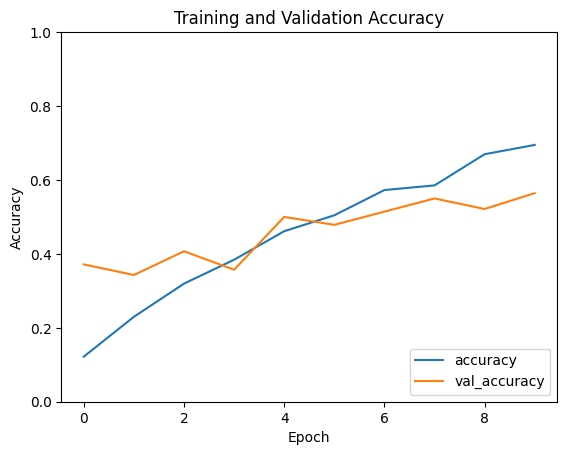

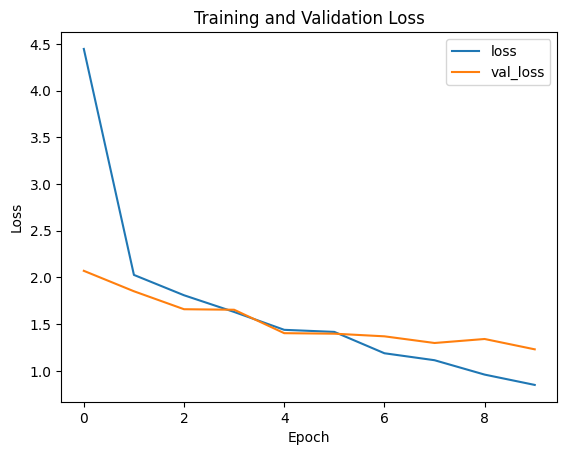

5/5 [==============================] - 0s 20ms/step - loss: 1.2304 - accuracy: 0.5643
Validation Loss: 1.2304223775863647
Validation Accuracy: 0.5642856955528259


In [ ]:

plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


loss, accuracy = cnn_model.evaluate(val_data, val_labels)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


#RESNET

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:

def load_data():
    dataset = []
    labels = []
    label_to_index = {}
    idx = 0

    for folder in os.listdir(IMG_PATH + '/train'):
        label_to_index[folder] = idx
        for file in os.listdir(IMG_PATH + '/train/' + folder):
            img_path = os.path.join(IMG_PATH + '/train/' + folder, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            dataset.append(img)
            labels.append(folder)
        idx += 1

    labels = [label_to_index[label] for label in labels]

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels


In [ ]:
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


resnet_model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

resnet_model.compile(optimizer=Adam(lr=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [ ]:

history_resnet = resnet_model.fit(train_data, train_labels,
                                  batch_size=32,
                                  epochs=10,
                                  validation_data=(val_data, val_labels))

Epoch 1/10
18/18 [==============================] - 14s 443ms/step - loss: 2.3695 - accuracy: 0.1131 - val_loss: 2.1850 - val_accuracy: 0.1857
Epoch 2/10
18/18 [==============================] - 2s 137ms/step - loss: 2.2153 - accuracy: 0.1095 - val_loss: 2.2261 - val_accuracy: 0.1071
Epoch 3/10
18/18 [==============================] - 3s 145ms/step - loss: 2.2282 - accuracy: 0.1113 - val_loss: 2.2013 - val_accuracy: 0.0929
Epoch 4/10
18/18 [==============================] - 3s 146ms/step - loss: 2.2001 - accuracy: 0.1059 - val_loss: 2.1967 - val_accuracy: 0.1500
Epoch 5/10
18/18 [==============================] - 3s 151ms/step - loss: 2.2004 - accuracy: 0.0916 - val_loss: 2.1944 - val_accuracy: 0.1357
Epoch 6/10
18/18 [==============================] - 2s 137ms/step - loss: 2.1993 - accuracy: 0.1167 - val_loss: 2.1974 - val_accuracy: 0.0714
Epoch 7/10
18/18 [==============================] - 3s 146ms/step - loss: 2.1962 - accuracy: 0.1257 - val_loss: 2.1974 - val_accuracy: 0.0714
Epoch

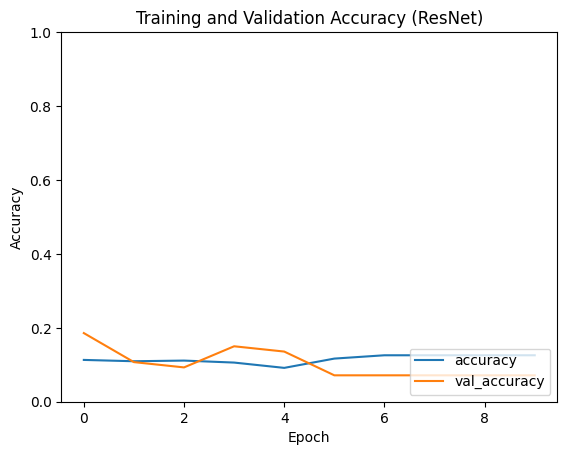

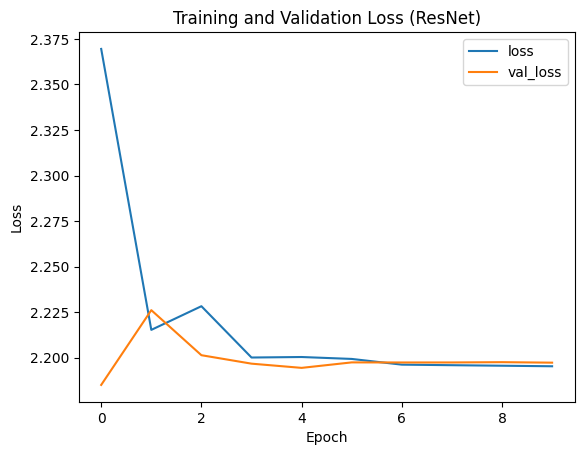

5/5 [==============================] - 1s 99ms/step - loss: 2.1973 - accuracy: 0.0714
Validation Loss (ResNet): 2.1972525119781494
Validation Accuracy (ResNet): 0.0714285746216774


In [ ]:

plt.plot(history_resnet.history['accuracy'], label='accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (ResNet)')
plt.show()

plt.plot(history_resnet.history['loss'], label='loss')
plt.plot(history_resnet.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (ResNet)')
plt.show()


loss, accuracy = resnet_model.evaluate(val_data, val_labels)
print(f'Validation Loss (ResNet): {loss}')
print(f'Validation Accuracy (ResNet): {accuracy}')

#DENSENET

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


densenet_model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


densenet_model.compile(optimizer=Adam(lr=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


history_densenet = densenet_model.fit(train_data, train_labels,
                                      batch_size=32,
                                      epochs=10,
                                      validation_data=(val_data, val_labels))


29084464/29084464 [==============================] - 0s 0us/step


Epoch 1/10
18/18 [==============================] - 22s 627ms/step - loss: 2.0401 - accuracy: 0.2837 - val_loss: 1.3566 - val_accuracy: 0.5643
Epoch 2/10
18/18 [==============================] - 3s 143ms/step - loss: 1.2734 - accuracy: 0.5673 - val_loss: 1.1058 - val_accuracy: 0.5857
Epoch 3/10
18/18 [==============================] - 2s 137ms/step - loss: 1.0424 - accuracy: 0.6391 - val_loss: 0.9811 - val_accuracy: 0.6000
Epoch 4/10
18/18 [==============================] - 3s 143ms/step - loss: 0.9164 - accuracy: 0.6786 - val_loss: 0.9020 - val_accuracy: 0.6643
Epoch 5/10
18/18 [==============================] - 2s 133ms/step - loss: 0.7785 - accuracy: 0.7397 - val_loss: 0.8285 - val_accuracy: 0.6357
Epoch 6/10
18/18 [==============================] - 2s 133ms/step - loss: 0.6881 - accuracy: 0.7702 - val_loss: 0.8674 - val_accuracy: 0.6714
Epoch 7/10
18/18 [==============================] - 3s 143ms/step - loss: 0.6764 - accuracy: 0.7612 - val_loss: 0.7995 - val_accuracy: 0.6571
Epoch

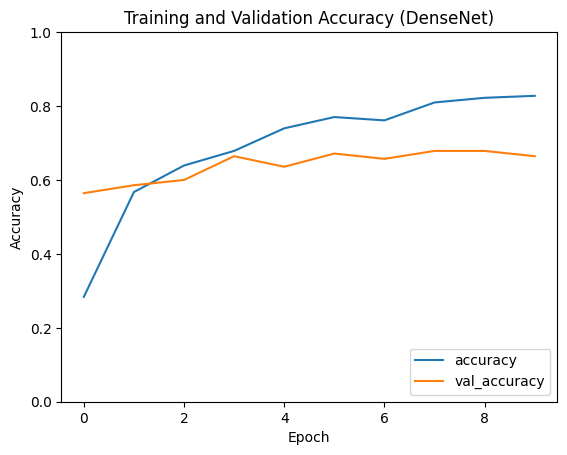

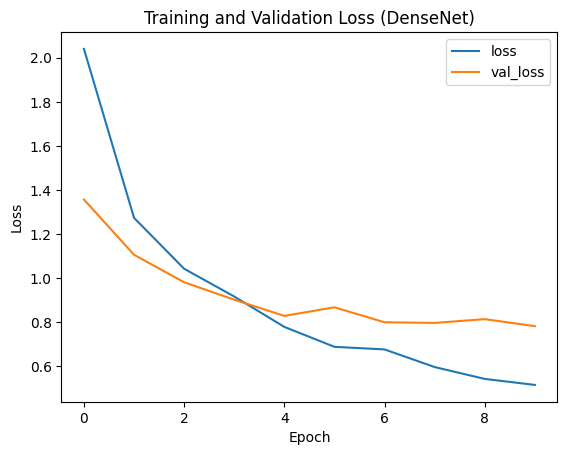

5/5 [==============================] - 1s 96ms/step - loss: 0.7820 - accuracy: 0.6643
Validation Loss (DenseNet): 0.7819975018501282
Validation Accuracy (DenseNet): 0.6642857193946838


In [ ]:

plt.plot(history_densenet.history['accuracy'], label='accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (DenseNet)')
plt.show()

plt.plot(history_densenet.history['loss'], label='loss')
plt.plot(history_densenet.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (DenseNet)')
plt.show()


loss, accuracy = densenet_model.evaluate(val_data, val_labels)
print(f'Validation Loss (DenseNet): {loss}')
print(f'Validation Accuracy (DenseNet): {accuracy}')

#MOBILENET

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Activation

In [ ]:

def build_mobilenet():
    model = Sequential([
        MobileNet(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False),
        Dropout(0.5),
        Conv2D(9, (1, 1), padding='valid'),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ])
    return model


mobilenet_model = build_mobilenet()
mobilenet_model.compile(optimizer=Adam(lr=0.0001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


history_mobilenet = mobilenet_model.fit(train_data, train_labels,
                                         batch_size=32,
                                         epochs=10,
                                         validation_data=(val_data, val_labels))

17225924/17225924 [==============================] - 0s 0us/step


Epoch 1/10
18/18 [==============================] - 19s 370ms/step - loss: 1.2458 - accuracy: 0.6014 - val_loss: 10.5340 - val_accuracy: 0.1143
Epoch 2/10
18/18 [==============================] - 3s 186ms/step - loss: 0.4461 - accuracy: 0.8582 - val_loss: 9.2554 - val_accuracy: 0.1357
Epoch 3/10
18/18 [==============================] - 3s 180ms/step - loss: 0.1601 - accuracy: 0.9390 - val_loss: 7.3753 - val_accuracy: 0.1714
Epoch 4/10
18/18 [==============================] - 3s 188ms/step - loss: 0.0842 - accuracy: 0.9731 - val_loss: 4.8427 - val_accuracy: 0.3429
Epoch 5/10
18/18 [==============================] - 3s 190ms/step - loss: 0.0629 - accuracy: 0.9767 - val_loss: 3.7290 - val_accuracy: 0.4071
Epoch 6/10
18/18 [==============================] - 3s 187ms/step - loss: 0.0515 - accuracy: 0.9820 - val_loss: 4.0186 - val_accuracy: 0.3357
Epoch 7/10
18/18 [==============================] - 3s 188ms/step - loss: 0.0814 - accuracy: 0.9856 - val_loss: 3.1770 - val_accuracy: 0.4214
Epoc

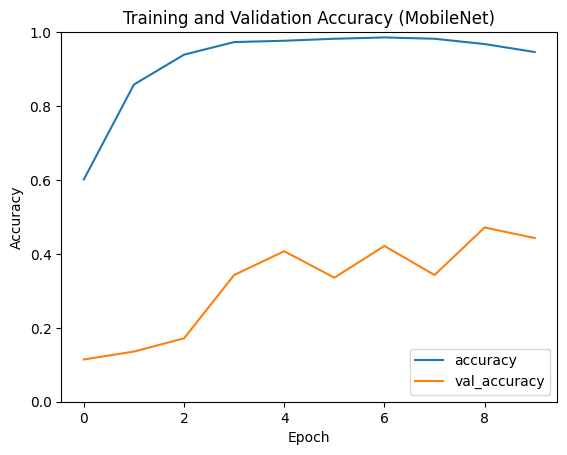

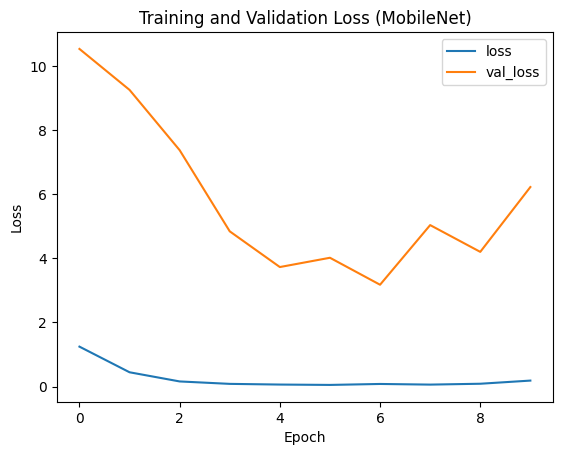

5/5 [==============================] - 0s 52ms/step - loss: 6.2248 - accuracy: 0.4429
Validation Loss (MobileNet): 6.224778175354004
Validation Accuracy (MobileNet): 0.44285714626312256


In [ ]:

plt.plot(history_mobilenet.history['accuracy'], label='accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (MobileNet)')
plt.show()

plt.plot(history_mobilenet.history['loss'], label='loss')
plt.plot(history_mobilenet.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (MobileNet)')
plt.show()


loss, accuracy = mobilenet_model.evaluate(val_data, val_labels)
print(f'Validation Loss (MobileNet): {loss}')
print(f'Validation Accuracy (MobileNet): {accuracy}')

5/5 [==============================] - 0s 112ms/step


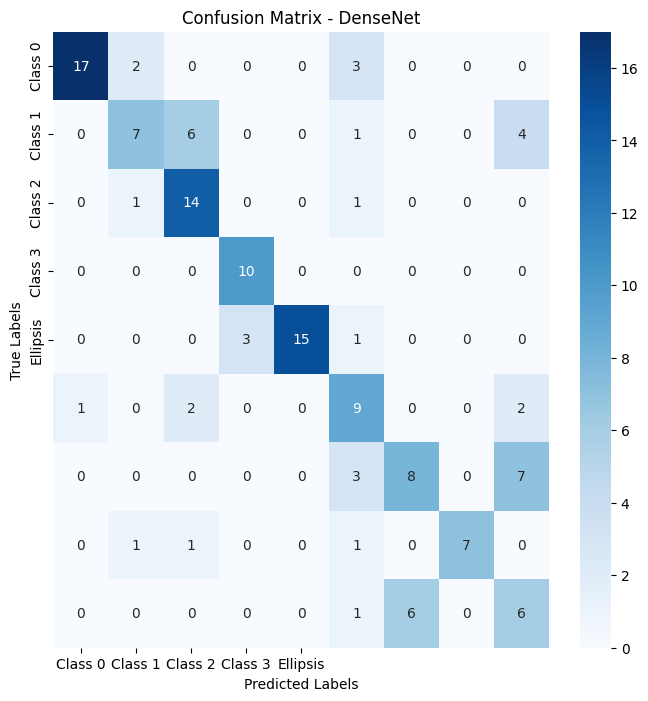

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', ...]


val_predictions = densenet_model.predict(val_data)
val_pred_labels = np.argmax(val_predictions, axis=1)


true_labels = np.argmax(val_labels, axis=1)


cm = confusion_matrix(true_labels, val_pred_labels)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - DenseNet')
plt.show()

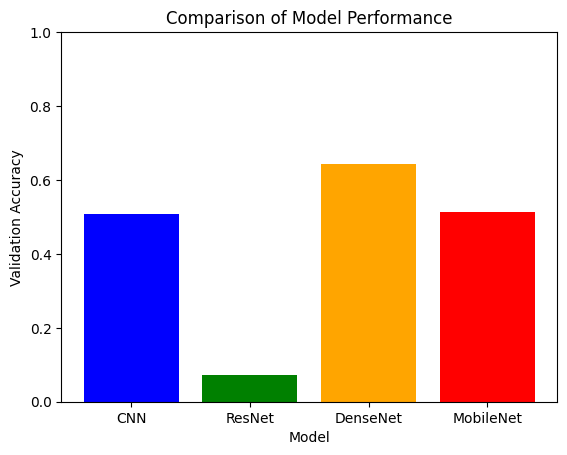

In [ ]:
import matplotlib.pyplot as plt


def plot_model_comparison(models, accuracies):
    plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
    plt.xlabel('Model')
    plt.ylabel('Validation Accuracy')
    plt.title('Comparison of Model Performance')
    plt.ylim(0, 1)
    plt.show()


models = ['CNN', 'ResNet', 'DenseNet', 'MobileNet']
accuracies = [0.507, 0.0714, 0.6429, 0.5143]
plot_model_comparison(models, accuracies)
